# This notebook

In this notebook, we exlore:
- number of relevant articles published each fortnight
- the general term and document frequency of the keywords across the news articles

## Settings

In [1]:
import os

In [2]:
import numpy as np
import pandas as pd

In [3]:
from math import log2

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import networkx as nx

In [6]:
%matplotlib inline

### Constant

In [7]:
DIR_DATA = os.environ.get("DIR_DATA_INTERIM")

In [8]:
term_freqs_nm = "kword_rawfreq_2W-MON.csv"
doc_freqs_nm = "kword_docfreq_2W-MON.csv"

In [9]:
# from src.news_media.get_keywords_trend import *

### Words that were captured and coded for sentiment but are not keywords

In [9]:
NON_KWORDS = ['herd_immunity', 'behavioural_fatigue']

## Import data

In [10]:
doc_freqs = pd.read_csv(os.path.join(DIR_DATA, doc_freqs_nm))

In [11]:
term_freqs = pd.read_csv(os.path.join(DIR_DATA, term_freqs_nm))

In [12]:
doc_freqs.article_count.sum()

647

In [17]:
doc_freqs

,fortnight_starting,american_behav_scientists,behav_analysis,behav_change,behav_econ,behav_insight,behav_insights_team,behav_science,behav_scientist,behavioural_economist,behavioural_fatigue,chater,halpern,herd_immunity,michie,nudge,psychologist,psychology,spi-b,article_count
0,2020-01-27,1,0,0,1,0,1,0,3,0,0,0,0,0,0,5,0,1,0,10
1,2020-02-10,2,0,0,1,1,1,3,1,0,0,0,0,0,0,4,2,0,0,13
2,2020-02-24,4,1,0,1,0,6,14,1,0,0,0,0,0,0,3,3,2,0,26
3,2020-03-09,5,0,3,3,1,30,56,7,1,3,1,24,54,12,14,5,24,2,108
4,2020-03-23,3,1,11,6,2,8,32,6,0,2,0,10,16,12,12,5,8,2,62
5,2020-04-06,4,2,3,6,2,5,35,9,0,3,0,1,14,5,6,7,10,3,63
6,2020-04-20,5,0,4,2,3,9,37,8,2,1,1,2,9,17,8,9,19,9,71
7,2020-05-04,3,4,8,4,0,11,34,10,3,0,0,6,8,21,2,8,20,25,102
8,2020-05-18,2,1,3,5,5,3,47,8,2,0,0,3,9,15,3,7,18,22,83
9,2020-06-01,0,0,4,0,0,1,22,2,0,0,0,0,3,11,1,4,7,9,39


In [18]:
term_freqs

,fortnight_starting,word_count,american_behav_scientists,behav_analysis,behav_change,behav_econ,behav_insight,behav_insights_team,behav_science,behav_scientist,behavioural_economist,behavioural_fatigue,chater,halpern,herd_immunity,michie,nudge,psychologist,psychology,spi-b
0,2020-01-27,2316,1,0,0,1,0,2,0,3,0,0,0,0,0,0,7,0,1,0
1,2020-02-10,2818,6,0,0,2,1,3,3,1,0,0,0,0,0,0,9,2,0,0
2,2020-02-24,5884,6,1,0,1,0,10,16,1,0,0,0,0,0,0,3,4,2,0
3,2020-03-09,33013,6,0,5,3,1,52,70,7,1,5,1,36,147,44,25,8,30,4
4,2020-03-23,17243,6,1,11,6,3,19,46,7,0,2,0,16,52,16,15,6,11,2
5,2020-04-06,14444,6,2,3,6,2,6,51,9,0,5,0,3,43,16,16,8,14,3
6,2020-04-20,22427,10,0,6,5,3,16,47,8,2,4,1,10,39,31,18,10,22,16
7,2020-05-04,25491,3,4,8,4,0,13,39,10,3,0,0,7,22,28,2,8,24,70
8,2020-05-18,26671,4,1,3,5,6,4,54,8,2,0,0,3,23,18,8,8,29,43
9,2020-06-01,12678,0,0,4,0,0,1,26,2,0,0,0,0,4,23,6,4,10,12


#### Exclude the two non-keywords

In [36]:
term_freqs.drop(NON_KWORDS, axis=1, inplace=True)

In [37]:
doc_freqs.drop(NON_KWORDS, axis=1, inplace=True)

## Number of articles published across the weeks

In [38]:
article_count_df = doc_freqs[['fortnight_starting', 'article_count']]
article_count_df

,fortnight_starting,article_count
0,2020-01-27,10
1,2020-02-10,13
2,2020-02-24,26
3,2020-03-09,108
4,2020-03-23,62
5,2020-04-06,63
6,2020-04-20,71
7,2020-05-04,102
8,2020-05-18,83
9,2020-06-01,39


In [39]:
article_count_df.article_count.sum()

647

In [40]:
article_count_df

,fortnight_starting,article_count
0,2020-01-27,10
1,2020-02-10,13
2,2020-02-24,26
3,2020-03-09,108
4,2020-03-23,62
5,2020-04-06,63
6,2020-04-20,71
7,2020-05-04,102
8,2020-05-18,83
9,2020-06-01,39


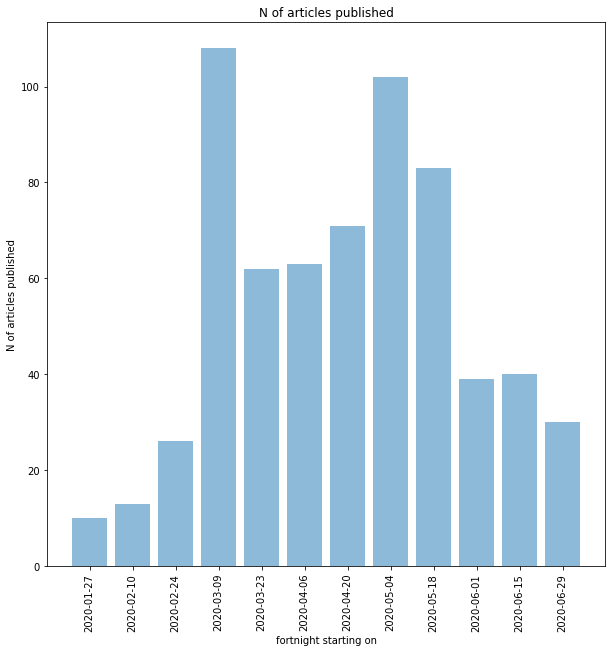

In [41]:
# historgram
fig, ax = plt.subplots(figsize=(10,10))  

plt.bar(article_count_df.fortnight_starting, article_count_df.article_count, align='center', alpha=0.5)
plt.xticks(article_count_df.fortnight_starting, rotation=90)
plt.xlabel('fortnight starting on')
plt.ylabel('N of articles published')
plt.title(f"N of articles published")

plt.show()

## So, how many words (as nouns) have been published each fortnight?

In [42]:
term_freqs[['fortnight_starting', 'word_count']]

,fortnight_starting,word_count
0,2020-01-27,2316
1,2020-02-10,2818
2,2020-02-24,5884
3,2020-03-09,33013
4,2020-03-23,17243
5,2020-04-06,14444
6,2020-04-20,22427
7,2020-05-04,25491
8,2020-05-18,26671
9,2020-06-01,12678


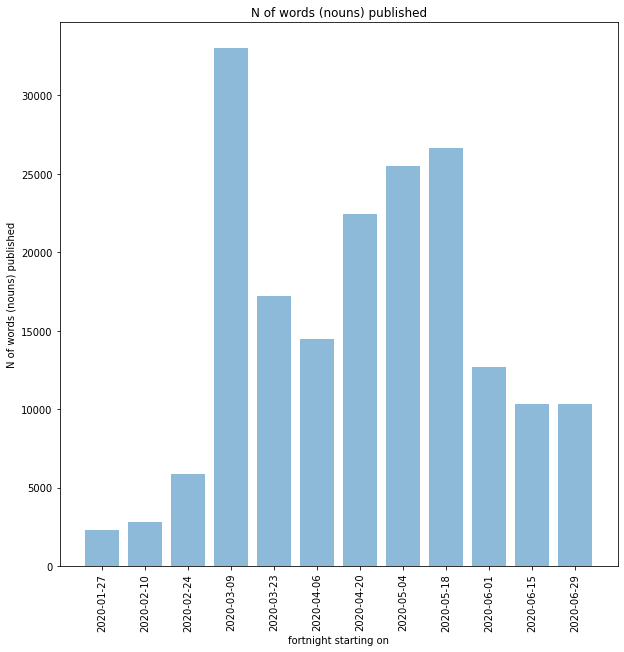

In [43]:
word_count_df = term_freqs[['fortnight_starting', 'word_count']]

# historgram
fig, ax = plt.subplots(figsize=(10,10))  

plt.bar(word_count_df.fortnight_starting, word_count_df.word_count, align='center', alpha=0.5)
plt.xticks(word_count_df.fortnight_starting, rotation=90)
plt.xlabel('fortnight starting on')
plt.ylabel('N of words (nouns) published')
plt.title(f"N of words (nouns) published")

plt.show()

# Frequency of keyword occurrence

### Document frequency - In how many articles has each keyword been mentioned in total?

In [44]:
# this is basically keywords ordered by document frequency
doc_freqs.set_index(['fortnight_starting', 'article_count']).sum(axis=0).sort_values(ascending=False)

behav_science                321
psychology                   121
michie                       108
spi-b                         81
behav_insights_team           77
behav_scientist               66
psychologist                  63
nudge                         62
halpern                       47
behav_change                  41
american_behav_scientists     33
behav_econ                    32
behav_insight                 16
behav_analysis                 9
behavioural_economist          8
chater                         2
dtype: int64

### What proportion of articles has each keyword been mentioned in? 

In [45]:
relative_doc_freqs = doc_freqs.set_index(['fortnight_starting', 'article_count']).sum() / doc_freqs.article_count.sum()

In [46]:
relative_doc_freqs = relative_doc_freqs.sort_values(ascending=False)

In [47]:
relative_doc_freqs

behav_science                0.496136
psychology                   0.187017
michie                       0.166924
spi-b                        0.125193
behav_insights_team          0.119011
behav_scientist              0.102009
psychologist                 0.097372
nudge                        0.095827
halpern                      0.072643
behav_change                 0.063369
american_behav_scientists    0.051005
behav_econ                   0.049459
behav_insight                0.024730
behav_analysis               0.013910
behavioural_economist        0.012365
chater                       0.003091
dtype: float64

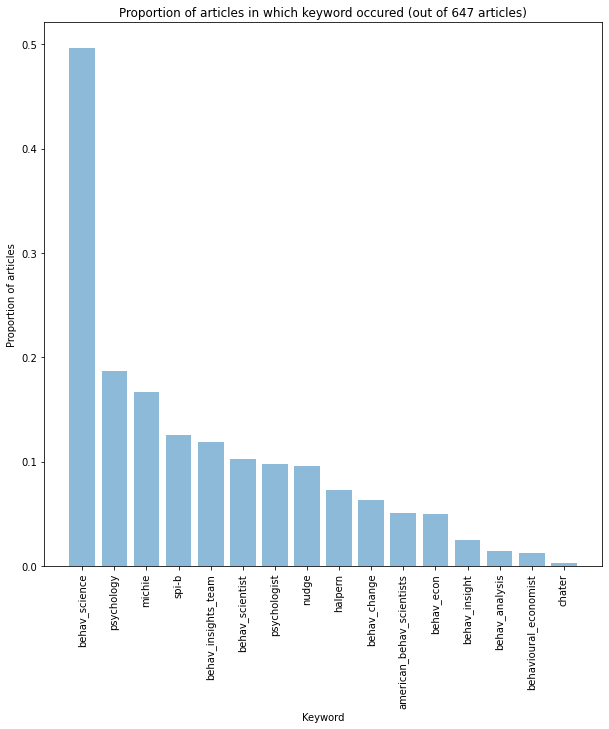

In [53]:
# historgram
fig, ax = plt.subplots(figsize=(10,10))  

plt.bar(relative_doc_freqs.index, relative_doc_freqs.values, align='center', alpha=0.5)
plt.xticks(relative_doc_freqs.index, rotation=90)
plt.xlabel('Keyword')
plt.ylabel('Proportion of articles')
plt.title(f"Proportion of articles in which keyword occured (out of {doc_freqs.article_count.sum()} articles)")

plt.show()

### How many times has each keyword been mentioned (raw frequency)?

Let's compare it with the ranking based on raw frequency (so total number of occurrences).

In [49]:
term_freqs

,fortnight_starting,word_count,american_behav_scientists,behav_analysis,behav_change,behav_econ,behav_insight,behav_insights_team,behav_science,behav_scientist,behavioural_economist,chater,halpern,michie,nudge,psychologist,psychology,spi-b
0,2020-01-27,2316,1,0,0,1,0,2,0,3,0,0,0,0,7,0,1,0
1,2020-02-10,2818,6,0,0,2,1,3,3,1,0,0,0,0,9,2,0,0
2,2020-02-24,5884,6,1,0,1,0,10,16,1,0,0,0,0,3,4,2,0
3,2020-03-09,33013,6,0,5,3,1,52,70,7,1,1,36,44,25,8,30,4
4,2020-03-23,17243,6,1,11,6,3,19,46,7,0,0,16,16,15,6,11,2
5,2020-04-06,14444,6,2,3,6,2,6,51,9,0,0,3,16,16,8,14,3
6,2020-04-20,22427,10,0,6,5,3,16,47,8,2,1,10,31,18,10,22,16
7,2020-05-04,25491,3,4,8,4,0,13,39,10,3,0,7,28,2,8,24,70
8,2020-05-18,26671,4,1,3,5,6,4,54,8,2,0,3,18,8,8,29,43
9,2020-06-01,12678,0,0,4,0,0,1,26,2,0,0,0,23,6,4,10,12


In [50]:
term_freqs.iloc[:, 2:].sum(axis=0).sort_values(ascending=False)

behav_science                424
michie                       206
spi-b                        166
psychology                   165
behav_insights_team          134
nudge                        113
halpern                       83
psychologist                  72
behav_scientist               68
american_behav_scientists     56
behav_change                  45
behav_econ                    36
behav_insight                 18
behav_analysis                 9
behavioural_economist          8
chater                         2
dtype: int64

We see that there are some similarity between the two ranks.

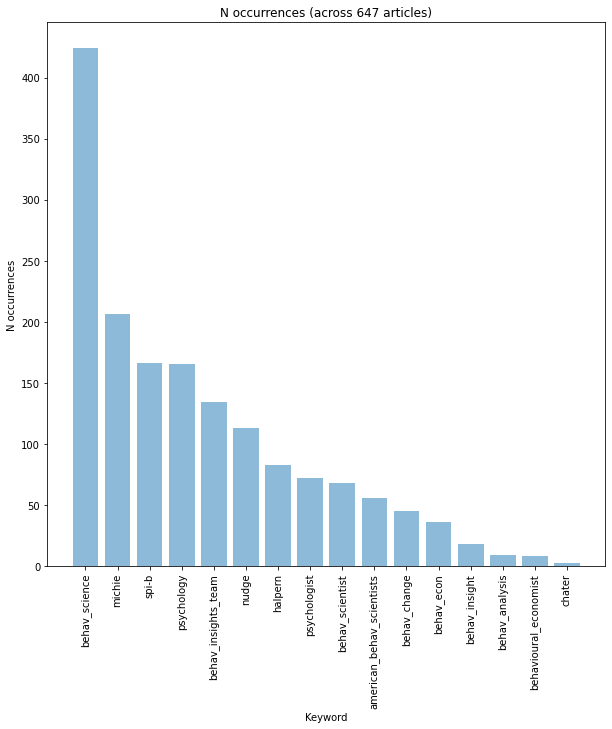

In [54]:
kword_freqs_df = term_freqs.iloc[:, 2:].sum(axis=0).sort_values(ascending=False)

# historgram
fig, ax = plt.subplots(figsize=(10,10))  

plt.bar(kword_freqs_df.index, kword_freqs_df.values, align='center', alpha=0.5)
plt.xticks(kword_freqs_df.index, rotation=90)
plt.xlabel('Keyword')
plt.ylabel('N occurrences')
plt.title(f"N occurrences (across {doc_freqs.article_count.sum()} articles)")

plt.show()

## EXCLUSION: We will exclude from the analysis those keywords that have a very low frequency (< 25 as the number of weeks we are considering). This excludes:

- behav_insights
- behavioural_economist
- behav_analysis
- chater

And the individual American behavioural scientist: thaler, khaneman, sunstein